In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.17.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18276077657989046225
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15571911057397868882
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('Fashion-MNIST')
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

# 特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
x = x / 255
y = np.identity(10)[y]

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')
x_train_2d = x_train.reshape((len(x_train), 28, 28, 1)) # CNN に入力するために 2D に変換
x_test_2d = x_test.reshape((len(x_test), 28, 28, 1)) # CNN に入力するために 2D に変換

x_train:5250 x_test:1750 y_train:5250 y_test:1750


Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

fmnist_model, accuracy_score: train data : 0.90400  test data : 0.84686
max_val_accuracy 0.847428560256958 (epoch=79)


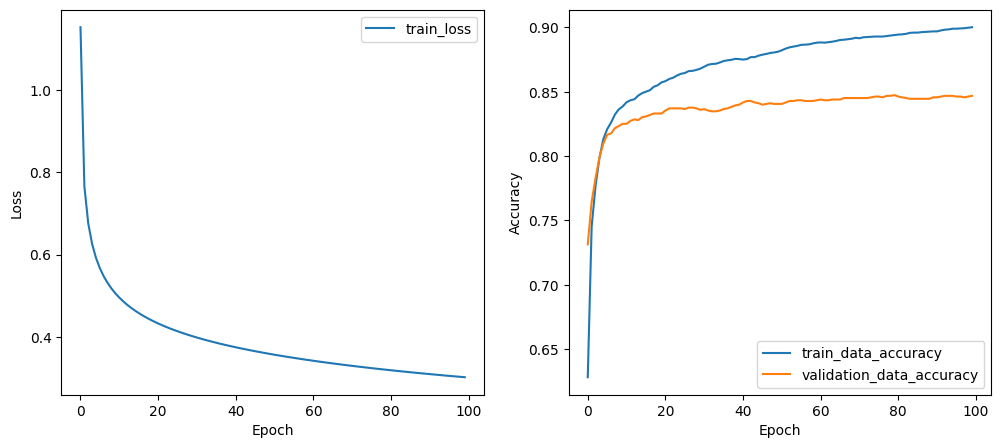

CPU times: user 1min 51s, sys: 9.09 s, total: 2min
Wall time: 2min 4s


In [6]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

fmnist_model, accuracy_score: train data : 0.96876  test data : 0.86057
max_val_accuracy 0.8605714440345764 (epoch=99)


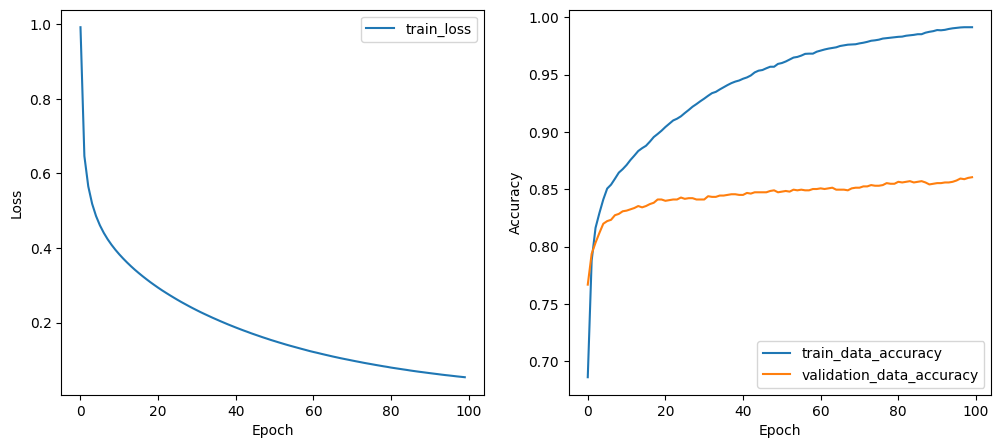

CPU times: user 1min 55s, sys: 9.1 s, total: 2min 4s
Wall time: 2min 4s


In [7]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,238,730 (4.73 MB)

 Trainable params: 1,238,730 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

fmnist_model, accuracy_score: train data : 0.99619  test data : 0.86629
max_val_accuracy 0.8662857413291931 (epoch=94)


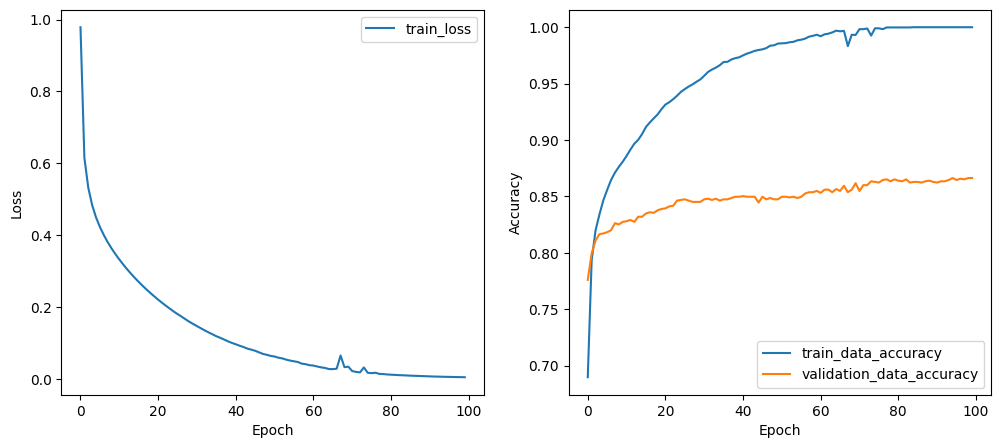

CPU times: user 2min 2s, sys: 9.33 s, total: 2min 12s
Wall time: 2min 5s


In [8]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,854,170 (7.07 MB)

 Trainable params: 1,854,170 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

fmnist_model, accuracy_score: train data : 1.00000  test data : 0.86857
max_val_accuracy 0.868571400642395 (epoch=97)


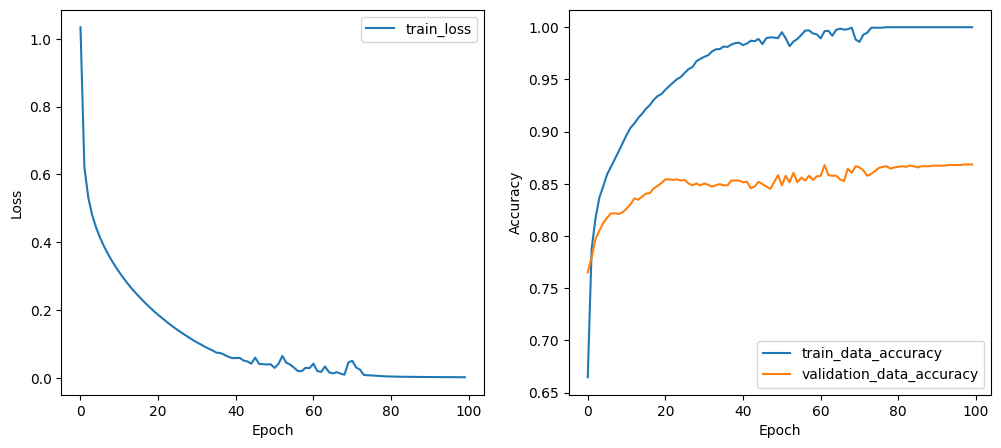

CPU times: user 2min 10s, sys: 10.3 s, total: 2min 21s
Wall time: 2min 7s


In [9]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │         108,170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,330 (423.16 KB)

 Trainable params: 108,330 (423.16 KB)

 Non-trainable params: 0 (0.00 B)

55/55 - 0s - 5ms/step - accuracy: 0.8537 - loss: 0.6652
fmnist_model, accuracy_score: train data : 0.99086  test data : 0.85371
max_val_accuracy 0.8622857332229614 (epoch=37)


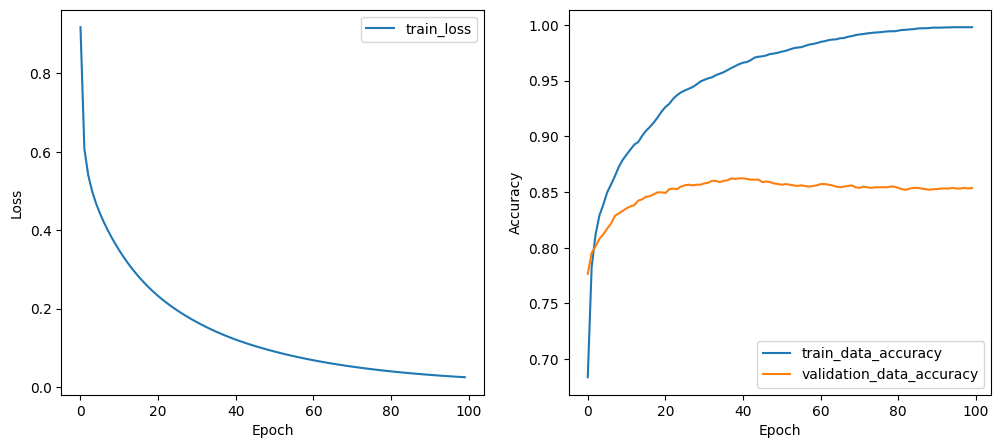

CPU times: user 1min 58s, sys: 9.71 s, total: 2min 8s
Wall time: 2min 16s


In [10]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(28,28,1))) # 28x28(784)入力の入力層
mnist_model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu')) # 3x3の畳み込み層を用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Flatten()) # 2次元データを1次元に変換
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train_2d, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test_2d, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train_2d, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test_2d, y_test, verbose=2)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,026 (5.29 MB)

 Trainable params: 1,386,026 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

55/55 - 0s - 9ms/step - accuracy: 0.8663 - loss: 0.8156
fmnist_model, accuracy_score: train data : 0.99981  test data : 0.86629
max_val_accuracy 0.8708571195602417 (epoch=83)


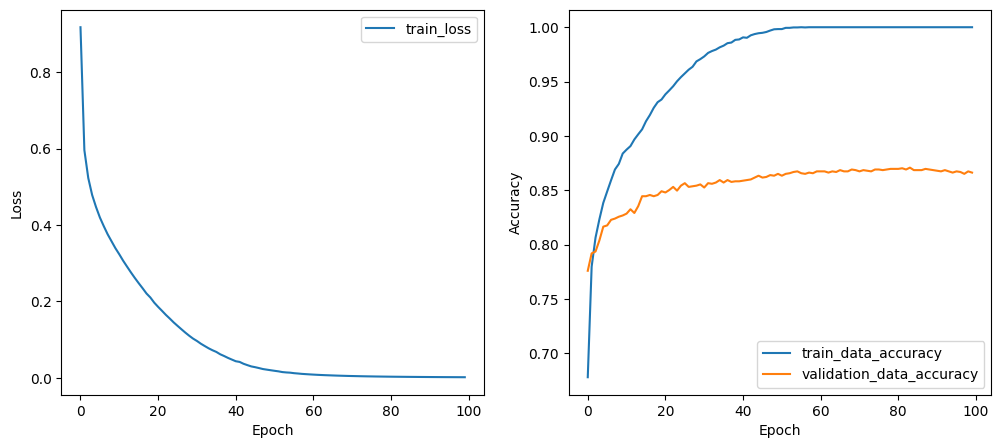

CPU times: user 2min 10s, sys: 9.71 s, total: 2min 20s
Wall time: 2min 15s


In [11]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(28,28,1))) # 28x28(784)入力の入力層
mnist_model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu')) # 3x3の畳み込み層を用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Flatten()) # 2次元データを1次元に変換
mnist_model.add(tf.keras.layers.Dense(units=128, activation='relu')) # セル128個の中間層を用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train_2d, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test_2d, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train_2d, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test_2d, y_test, verbose=2)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │          27,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

55/55 - 1s - 12ms/step - accuracy: 0.8697 - loss: 0.4818
fmnist_model, accuracy_score: train data : 0.95886  test data : 0.86971
max_val_accuracy 0.8725714087486267 (epoch=57)


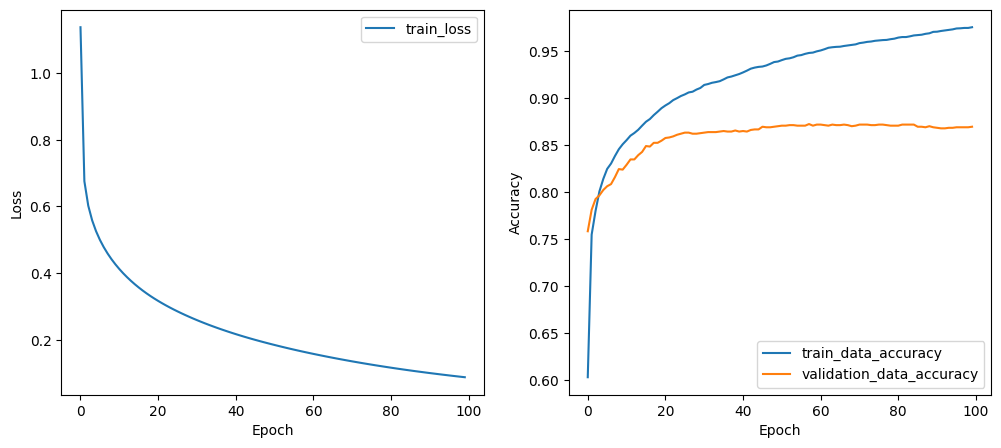

CPU times: user 1min 59s, sys: 9.63 s, total: 2min 8s
Wall time: 2min 10s


In [12]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(28,28,1))) # 28x28(784)入力の入力層
mnist_model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu')) # 3x3の畳み込み層を用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.MaxPooling2D((2,2))) # プーリング層
mnist_model.add(tf.keras.layers.Flatten()) # 2次元データを1次元に変換
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train_2d, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test_2d, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train_2d, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test_2d, y_test, verbose=2)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()

Model: "fmnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         346,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,690 (1.33 MB)

 Trainable params: 347,690 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

55/55 - 0s - 9ms/step - accuracy: 0.8817 - loss: 0.6395
fmnist_model, accuracy_score: train data : 0.99486  test data : 0.88171
max_val_accuracy 0.8828571438789368 (epoch=83)


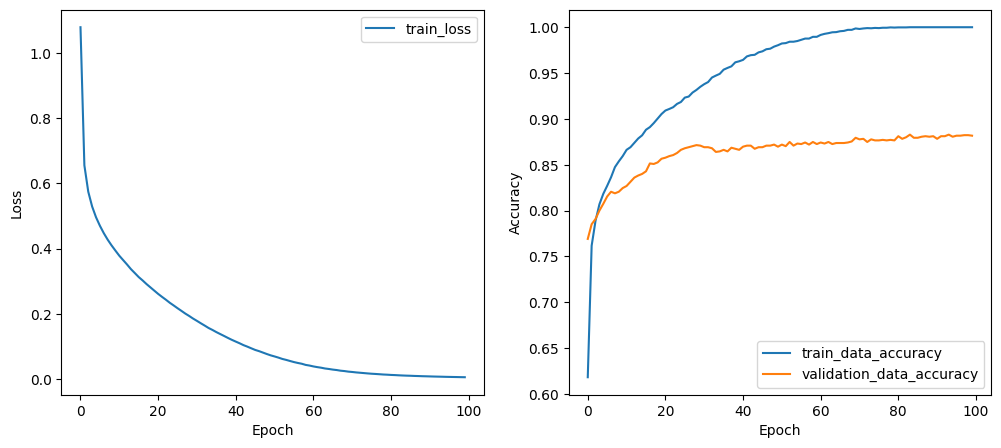

CPU times: user 2min 2s, sys: 9.73 s, total: 2min 12s
Wall time: 2min 12s


In [13]:
%%time
# ニューラルネットワークのモデルを作成
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
mnist_model = tf.keras.models.Sequential(name='fmnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(28,28,1))) # 28x28(784)入力の入力層
mnist_model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu')) # 3x3の畳み込み層を用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.MaxPooling2D((2,2))) # プーリング層
mnist_model.add(tf.keras.layers.Flatten()) # 2次元データを1次元に変換
mnist_model.add(tf.keras.layers.Dense(units=128, activation='relu')) # セル128個の中間層を用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train_2d, y_train, epochs=100, batch_size=10, verbose=0, # fit関数で学習を実施
                          validation_data=(x_test_2d, y_test))  # validation用のデータを設定

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train_2d, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test_2d, y_test, verbose=2)
print(f'fmnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')
_max = max(history.history['val_accuracy'])
print(f'max_val_accuracy {_max} (epoch={history.history["val_accuracy"].index(_max)})')

# 学習中の精度の変化をグラフで表示
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].plot(history.history['loss'], label='train_loss') # 学習中のlossの変化をグラフで表示
ax[0].legend(loc='upper right')
ax[1].plot(history.history['accuracy'], label='train_data_accuracy') # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy'], label='validation_data_accuracy') # 学習中の検証用データに対する正解率の変化をグラフで表示
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='lower right')
plt.show()